#HW3.1

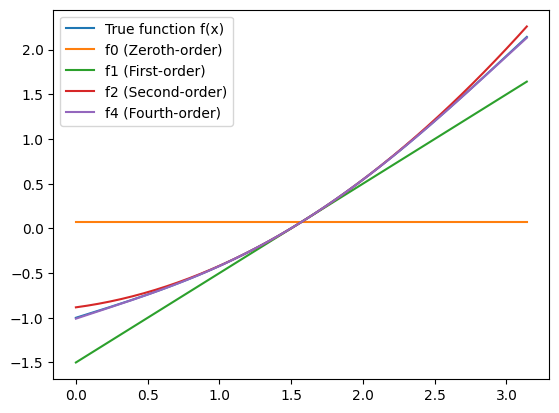

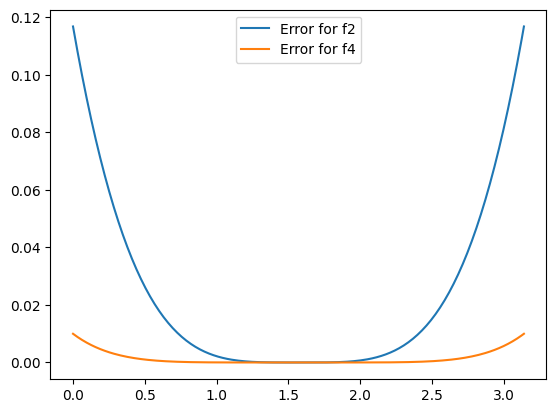

In [ ]:
# how should the ouptput of either plot be formatted?
# f0, f1, f2... then error0, error1, error2...
# OR f0, error0, f1, error1 ...

# np.axes
# f0 - f5
# error 2 and 4

import math
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

pi_2 = math.pi / 2
x = smp.symbols('x')

f = x - 1 - 0.5 * smp.sin(x)
f_num = smp.lambdify(x, f)

df_dx = smp.diff(f, x)
df_dx_num = smp.lambdify(x, df_dx)
d2f_dx2 = smp.diff(df_dx, x)
d2f_dx2_num = smp.lambdify(x, d2f_dx2)
d3f_dx3 = smp.diff(d2f_dx2, x)
d3f_dx3_num = smp.lambdify(x, d3f_dx3)
d4f_dx4 = smp.diff(d3f_dx3, x)
d4f_dx4_num = smp.lambdify(x, d4f_dx4)

#f0 = f_num(pi_2)
#f0_num = smp.lambdify(x, f0)
def f0_num(x):
  return [f_num(pi_2)] * len(x)

def f1_num(x):
  return f0_num(x) + (-0.5 * np.cos(pi_2) + 1) * (x - pi_2)

def f2_num(x):
  return f1_num(x) + (0.5 * np.sin(pi_2) / 2) * (x - pi_2)**2

def f3_num(x):
  return f2_num(x) + (0.5 * np.cos(pi_2) / math.factorial(3)) * (x - pi_2)**3

def f4_num(x):
  return f3_num(x) + (-0.5 * np.sin(pi_2) / math.factorial(4)) * (x - pi_2)**4

'''f1 = f0 + df_dx_num(pi_2) * (x - pi_2)
f1_num = smp.lambdify(x, f1)

f2 = f1 + (d2f_dx2_num(pi_2) / math.factorial(2)) * (x - pi_2)**2
f2_num = smp.lambdify(x, f2)

f3 = f2 + (d3f_dx3_num(pi_2) / math.factorial(3)) * (x - pi_2)**3

f4 = f3 + (-d4f_dx4_num(pi_2) / math.factorial(4)) * (x-pi_2)**4
f4_num = smp.lambdify(x, f4)'''

space = np.linspace(0, math.pi, 200)

def taylor_expansion(x):
  f_list = f_num(x)
  f0_list = f0_num(x)
  f1_list = f1_num(x)
  f2_list = f2_num(x)
  f4_list = f4_num(x)
  return f_list, f0_list, f1_list, f2_list, f4_list

def taylor_expansion_plot_func(x):
  fig, chart = plt.subplots()
  labels = ["True function f(x)", "f0 (Zeroth-order)", "f1 (First-order)", "f2 (Second-order)", "f4 (Fourth-order)"]
  for fx, l in zip(taylor_expansion(x), labels):
    chart.plot(x, fx, label = l)
  plt.legend()
  return chart

#def r_error(apr, tru):
#  return np.abs((apr - tru) / tru)

def taylor_error_plot_func(x):
  f_list, f0_list, f1_list, f2_list, f4_list = taylor_expansion(x)
  #f2_error = r_error(f2_list, f_list)
  #f4_error = r_error(f4_list, f_list)
  f2_error = np.abs(f2_list - f_list)
  f4_error = np.abs(f4_list - f_list)
  fig, chart = plt.subplots()
  chart.plot(x, f2_error, label = "Error for f2")
  chart.plot(x, f4_error, label = "Error for f4")
  plt.legend()
  return chart

taylor_expansion_plot = taylor_expansion_plot_func(space)
taylor_error_plot = taylor_error_plot_func(space)
plt.show()

# HW3.2

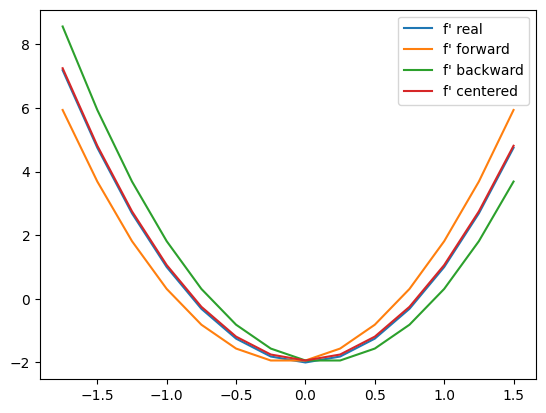

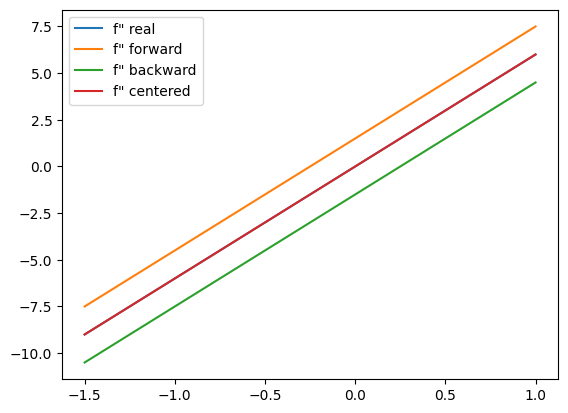

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 17)
h = 0.25

def f(x):
  return x**3 - 2 * x + 4

def df_dx(x):
  return 3 * x**2 - 2

def d2f_dx2(x):
  return 6 * x

def fwd_dif(x, h):
  x_len = len(x)
  dif = [None] * (x_len - 1)
  for i in range(0, x_len - 1):
    dif[i] = (x[i+1] - x[i]) / h
  return dif

def bwd_dif(x, h):
  x_len = len(x)
  dif = [None] * (x_len - 1)
  for i in range(1, x_len):
    dif[i - 1] = (x[i] - x[i - 1]) / h
  return dif

def cen_dif(x, h):
  x_len = len(x)
  dif = [None] * (x_len - 2)
  for i in range(1, x_len - 1):
    dif[i - 1] = (x[i+1] - x[i - 1]) / (2*h)
  return dif

def finite_difference_approximations():
  fig1, ax1 = plt.subplots()
  f_x1 = plt.plot(x[1:-2], df_dx(x[1:-2]), label = "f\' real")
  f_fwd1 = plt.plot(x[1:-2], fwd_dif(f(x[1:-1]), h), label = "f\' forward")
  f_bwd1 = plt.plot(x[1:-2], bwd_dif(f(x[0:-2]), h), label = "f\' backward")
  f_cen1 = plt.plot(x[1:-2], cen_dif(f(x[0:-1]), h), label = "f\' centered")
  plt.legend()
  fig2, ax2 = plt.subplots()
  f_x2 = plt.plot(x[2:-4], d2f_dx2(x[2:-4]), label = "f\" real")
  f_fwd2 = plt.plot(x[2:-4], fwd_dif(fwd_dif(f(x[2:-2]), h), h), label = "f\" forward")
  f_bwd2 = plt.plot(x[2:-4], bwd_dif(bwd_dif(f(x[0:-4]), h), h), label = "f\" backward")
  f_cen2 = plt.plot(x[2:-4], cen_dif(cen_dif(f(x[0:-2]), h), h), label = "f\" centered")
  plt.legend()

  return ax1, ax2

ax1, ax2 = finite_difference_approximations()

first_derivative_plot = ax1
second_derivative_plot = ax2
plt.show()


#HW3.3

In [ ]:
import math

def maclaurin_cos(x, tol = 1e-4, maxit = 50):
  iter = 1; sol = 1; ea = 100
  while True:
    solold = sol
    sol = sol + (-1)**iter * x**(2 * iter) / math.factorial(2 * iter)
    iter = iter + 1
    if sol != 0:
      ea = abs((sol - solold) / sol) * 100
    if ea < tol or iter >= maxit:
      break
  fx = sol
  return fx, ea, iter

result_pi_over_3 = maclaurin_cos(math.pi / 3)
result_7pi_over_3 = maclaurin_cos(7 * math.pi / 3)

print(result_pi_over_3)
print(result_7pi_over_3)

(0.4999999963909432, 8.740839498676053e-05, 6)
(0.4999999824828669, 6.779063088569495e-05, 16)


#HW3.4

In [ ]:
import math

def solve_for_N(T0, T, mu0, q, ni, rho):
  a = 0; b = 2.5e+10;
  mu = mu0 * (T / T0)**-2.42
  for i in range(20):
    N = (a + b) / 2
    n = 0.5 * (N + math.sqrt(N**2 + 4*ni**2))
    rho_temp = 1 / (q * n * mu)
    if rho_temp < rho: b = N
    else: a = N
  return N

print(solve_for_N(300, 1000, 1360, 1.7e-19, 6.24e+9, 6.5e+6))

9083104133.605957


#HW3.5

In [ ]:
# how do I calculate tolerance for this system?
# "Tolerance is 5%" What is the tolerance a percentage of?

# input as a decimal 0.02
# if relative error < 0.02

import math

def false_position_method(xl, xu, tol=0.0003, maxit=30):
  m = 95; vel = 46; t = 9; g = 9.81;
  def v(c):
    return math.sqrt(m * g / c) * math.tanh(t * math.sqrt(m * g * c) / m) - vel
  x = (xl * v(xu) - xu * v(xl)) / (v(xu) - v(xl))
  if not (xl < x < xu):
    raise ValueError("The initial guesses do not bracket the root.")
  x = 100
  for i in range(1, maxit + 1):
    x_old = x
    x = (xl * v(xu) - xu * v(xl)) / (v(xu) - v(xl))
    if v(xl) * v(x) < 0: xu = x
    else: xl = x
    ea = abs(x - x_old)
    #ea = abs(v(x))
    er = abs(ea / vel)
    if er <= tol: break
  return x, ea, er, i

xl = 0.2; xu = 0.5; tol = 0.0003;
print(false_position_method(xl, xu, tol))

(0.39874679621587855, 0.005600656732102027, 0.0001217534072196093, 3)


#HW3.6

In [ ]:
# doesnt say what to return for 'plot_function()' just that my output
# could not be unpacked

# have no clue what is wrong with my incremental search, seems to work to me
# the function definition says it must be called with xl, xu, tol
# but it is called with only 2 parameters with no mention of a default
# value for tol

# x, f_x packed

# this one is goobered

import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return np.sin(x) - x**2

def incremental_search(x_min, x_max, step = 0.01):
  x = x_min
  f_x = f(x)
  i = 1
  while x < x_max:
    i += 1
    old_f_x = f_x
    x = x_min + step * i
    f_x = f(x)
    if f_x * old_f_x < 0:
      break
  return [[x_min + (i - 1) * step, x_min + i * step]]

def plot_function():
  x = np.linspace(0.01, 2, 200)
  f_x = f(x)
  fig, chart = plt.subplots()
  chart.plot(x,f_x)
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.title("f(x) = sin(x) - x^2")
  return chart

def bisection_method(xl, xu, tol = 1e-7):
  iter = 0
  temp = 0
  while True:
    iter = iter + 1
    x = (xl + xu) / 2
    f_x = f(x)
    if f_x < 0: xu = x
    else: xl = x
    error = abs(f_x)
    if error <= tol:
      if temp < 2:
        temp += 1
        continue
      break
  return x, error, iter

#plot_function()
print(bisection_method(0.01, 2))
#print(type(plot_function()))
#print(incremental_search(0.01, 2))

(0.876726242005825, 2.963857526072644e-08, 25)


#HW3.7

In [ ]:
# Little gripe but L R C is listed as
# L R C, R C L, and R L C throughout the problem

import math
import scipy.optimize as opt

def find_frequency(R, L, C, xl, xu):
  def Z(w):
    return 1 / math.sqrt((1 / R**2) + (w * C - (1 / (w * L)))**2) - 100
  a = xl - 100; b = xu - 100;
  return opt.brentq(Z, a, b)

print(find_frequency(225, 0.5, 0.0000066, 1, 1000))

195.191834259202


#HW3.8

In [ ]:
# is there any way I could know what each test case is?
# basically no feedback from the problem since I cant see the struture of each list

# use numpy data sort

import numpy as np

# partial sum of negative and positive numbers

#def sum_function(arr):
#data = np.array([-2.4, -1.1, 0, 1.1, 2.1])
n_arr = data[data < 0]
p_arr = data[data >= 0]
n_sum = sum(np.sort(n_arr)[::-1])
p_sum = sum(np.sort(p_arr))
data_sum = n_sum + p_sum

#print(data_sum)

#data = np.array([-2.2, -1.1, 0, 1.1, 2.2])
#data_sum = sum_function(data)

-0.2999999999999998


#HW3.9

In [ ]:
x_72 = x**0.72
f_x = f_hat(x)
relative_error = abs(x_72 - f_x) / x_72

#HW3.12

In [ ]:
import math

def sin_n_3(x, x0):
  return math.sin(x0) + (math.cos(x0) * (x - x0)) - (math.sin(x0) * (x - x0)**2) / math.factorial(2) - (math.cos(x0) * (x - x0)**3) / math.factorial(3)

def r_error(apr, tru):
  return abs(apr - tru) / tru

x_hat = 0.7
err_0_1 = r_error(x_hat, math.sin(x_hat))
err_0_3 = r_error(sin_n_3(x_hat, 0), math.sin(x_hat))
err_pi4_3 = r_error(sin_n_3(x_hat, math.pi / 4), math.sin(x_hat))

#print(err_0_3)

#HW3.17

In [ ]:
import numpy as np

# temp, just for preliminary testing
#test_data = np.array([('LED0', 0.58), ('Screen', 0.24), ('EnergyConsumed', 1.2)])
#components = np.array(['LED0', 'Screen'])


time, power = np.zeros((10,10)), np.zeros((10,))
test_dict = {key: i for i, key in enumerate(components)}
#energy_consumed = test_dict['EnergyConsumed']
for x, y in enumerate(test_data.values()):
  for key, val in test_dict.items():
    if key == 'EnergyConsumed': power[x] = val
    else: time[x, test_dict[key]] = val

power_usage = np.linalg.solve(time, power)

print(power_usage)

(10, 10)
(10,)


AttributeError: 'numpy.ndarray' object has no attribute 'values'